In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dense, GRU, Embedding, Dropout
from keras.optimizers import RMSprop
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
#from keras.initializers import RandomUniform
#from keras.initializers import Initializer

import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math




sns.set_style("whitegrid")
current_palette = sns.color_palette('colorblind')

Using TensorFlow backend.


In [2]:
features = 20 #entspricht der Anzahl der Sensoren
timesteps = 22 # *0.05s --> definiert die Zeitspanne in der zeitliche Abhängigkeiten vom Netzwerk erlernt werden können
batchsize = 128
LSTM_size = 64 #ANzahl der LSTM-Zellen
Dense_size = 32
epochen = 100


name = 'NN2_3_1_2_My'

#init = RandomUniform(minval=-0.05, maxval=0.05)

In [3]:
# Um Vorhandenes, bereits trainiertes Model zu laden:

from keras.models import load_model
model = load_model('model/'+name)

#### Aufbau Model

In [4]:
model = Sequential()
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True,
               batch_input_shape=(None, timesteps, features)))
#model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True))
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=False))
#model.add(Dense(Dense_size))
model.add(Dense(Dense_size))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

#### Trainingsdaten laden

In [14]:
x_train = np.load('Regression_Daten/x_train.npy').astype('float32')
x_val = np.load('Regression_Daten/x_val.npy').astype('float32')
x_test = np.load('Regression_Daten/x_test.npy').astype('float32')

y_train = np.load('Regression_Daten/y_My_train2.npy').astype('float32')
y_val = np.load('Regression_Daten/y_My_val2.npy').astype('float32')
y_test = np.load('Regression_Daten/y_My_test2.npy').astype('float32')

In [17]:
x_train.shape, y_train.shape

((11392, 22, 20), (11392, 1))

#### Model trainieren

In [6]:
model.fit(x_train, y_train,
          batch_size=batchsize , epochs=epochen, validation_data=(x_val, y_val))

Train on 11392 samples, validate on 2944 samples
Epoch 1/100
11392/11392 [==============================] - 7s 603us/step - loss: 279.3591 - val_loss: 98.7150
Epoch 2/100
11392/11392 [==============================] - 5s 421us/step - loss: 122.8152 - val_loss: 77.8337
Epoch 3/100
11392/11392 [==============================] - 5s 426us/step - loss: 96.6122 - val_loss: 64.6356
Epoch 4/100
11392/11392 [==============================] - 5s 414us/step - loss: 79.9087 - val_loss: 50.2676
Epoch 5/100
11392/11392 [==============================] - 5s 410us/step - loss: 71.5979 - val_loss: 55.1677
Epoch 6/100
11392/11392 [==============================] - 5s 410us/step - loss: 65.9927 - val_loss: 55.8478
Epoch 7/100
11392/11392 [==============================] - 5s 401us/step - loss: 61.2959 - val_loss: 58.0034
Epoch 8/100
11392/11392 [==============================] - 5s 400us/step - loss: 58.6511 - val_loss: 55.3179
Epoch 9/100
11392/11392 [==============================] - 5s 399us/step - lo

11392/11392 [==============================] - 4s 317us/step - loss: 26.3655 - val_loss: 62.6974
Epoch 76/100
11392/11392 [==============================] - 4s 321us/step - loss: 26.2411 - val_loss: 56.4077
Epoch 77/100
11392/11392 [==============================] - 4s 316us/step - loss: 26.3152 - val_loss: 59.3771
Epoch 78/100
11392/11392 [==============================] - 4s 324us/step - loss: 25.6011 - val_loss: 55.0945
Epoch 79/100
11392/11392 [==============================] - 3s 306us/step - loss: 26.5006 - val_loss: 55.7898
Epoch 80/100
11392/11392 [==============================] - 4s 311us/step - loss: 25.4721 - val_loss: 56.0639
Epoch 81/100
11392/11392 [==============================] - 4s 309us/step - loss: 25.9024 - val_loss: 57.8958
Epoch 82/100
11392/11392 [==============================] - 4s 308us/step - loss: 25.4862 - val_loss: 53.1854
Epoch 83/100
11392/11392 [==============================] - 3s 301us/step - loss: 25.1659 - val_loss: 61.1488
Epoch 84/100
11392/1139

In [7]:
history_dict = model.history.history
history_dict

{'val_loss': [98.71502005535623,
  77.83374396614407,
  64.63562484409498,
  50.2675953740659,
  55.167741651120394,
  55.847750622293226,
  58.00338247547979,
  55.317910277325176,
  62.23474884033203,
  57.23156215833581,
  55.626137194426164,
  54.29565255538277,
  66.36467481696087,
  63.732793725055195,
  60.110324279121734,
  58.52105103368344,
  57.91496297587519,
  59.64426264555558,
  54.006877982098125,
  60.62676939756974,
  57.56540961887526,
  66.43794262927511,
  62.10623392851456,
  54.78142414922299,
  50.42590983017631,
  61.915669565615445,
  50.529311843540356,
  55.07486824367357,
  54.244211984717325,
  64.44291342859682,
  50.59762593974238,
  55.92691031746242,
  55.004969016365386,
  54.41656983417013,
  61.36456191021463,
  57.853572306425676,
  62.987295150756836,
  52.74875703065292,
  52.24700600167979,
  47.15527455703072,
  60.58366505996041,
  58.67797515703284,
  61.97217733963676,
  65.00403031058933,
  56.19886365144149,
  50.6000803242559,
  56.864151

#### Analysiere Trainingsergebnisse

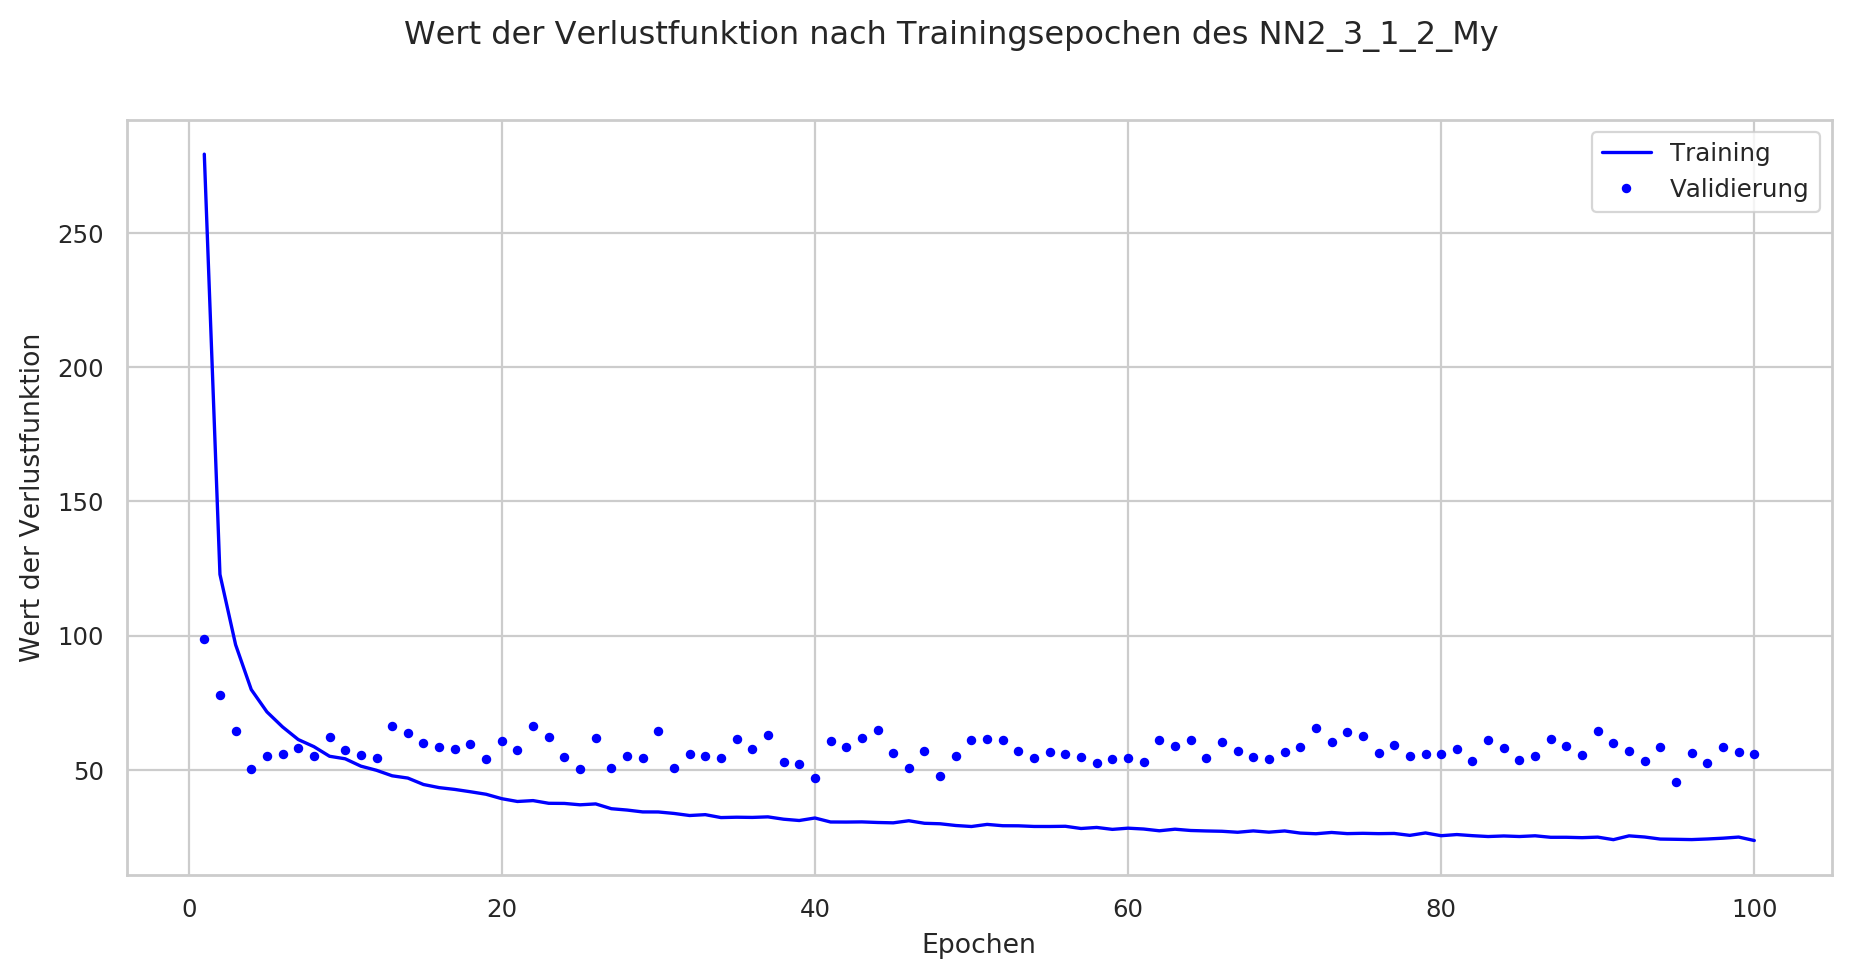

In [8]:
sns.set_context("paper")

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
#f, (ax1,ax2) = plt.subplots(1,2, figsize=(11, 5), dpi=100, facecolor='w', edgecolor='k')
#f.suptitle('Trainingsverlauf '+name)
plt.plot(epochs, loss_values, 'b',label='Training')
plt.plot(epochs, val_loss_values, 'b.',label='Validierung')
plt.suptitle('Wert der Verlustfunktion nach Trainingsepochen des '+name)
plt.xlabel('Epochen')
plt.ylabel('Wert der Verlustfunktion')

plt.legend()#bbox_to_anchor=(0.9, 0., 0.5, 0.5), borderaxespad=1)
plt.show()

#### Anwendung des trainierten Models auf 'unbekannte' Trainingsdaten

In [5]:
predictions = model.predict(x_test,batch_size=batchsize)
y_real = y_test

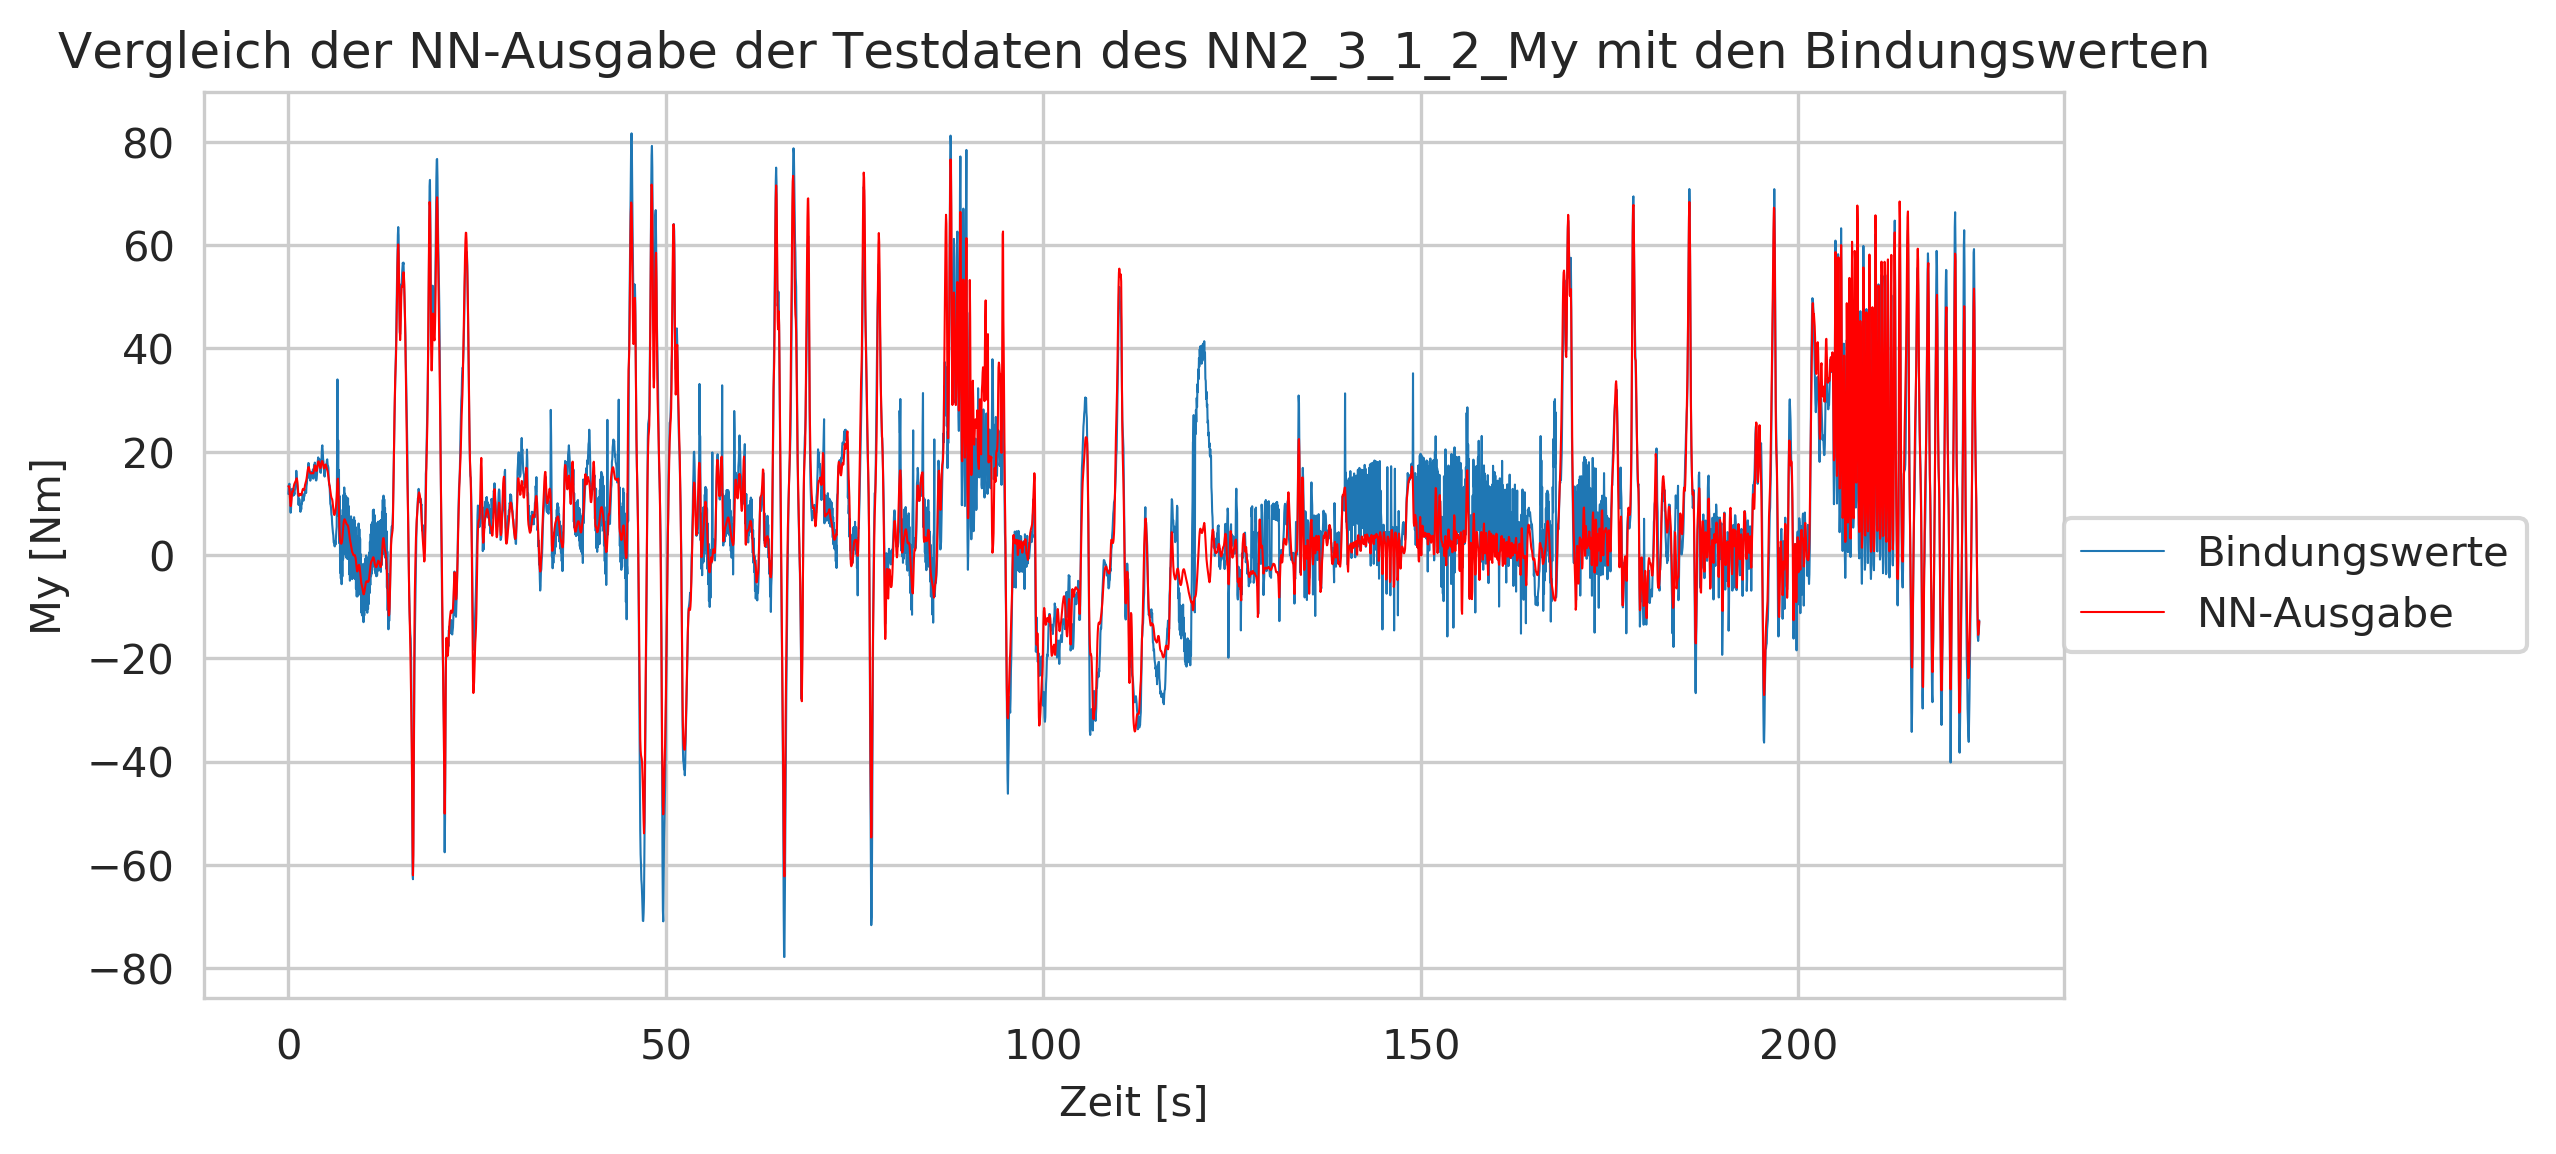

In [6]:
plt.figure(num=None, figsize=(8,4), dpi=300, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.5)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.5)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('My [Nm]')
plt.legend(bbox_to_anchor=(1, 0.15, 0.2, 0.38), borderaxespad=0)
#plt.xlim(left=140, right=220)
#plt.xlim(left=150, right=200)
#plt.ylim(bottom=-10, top=10)
plt.show()

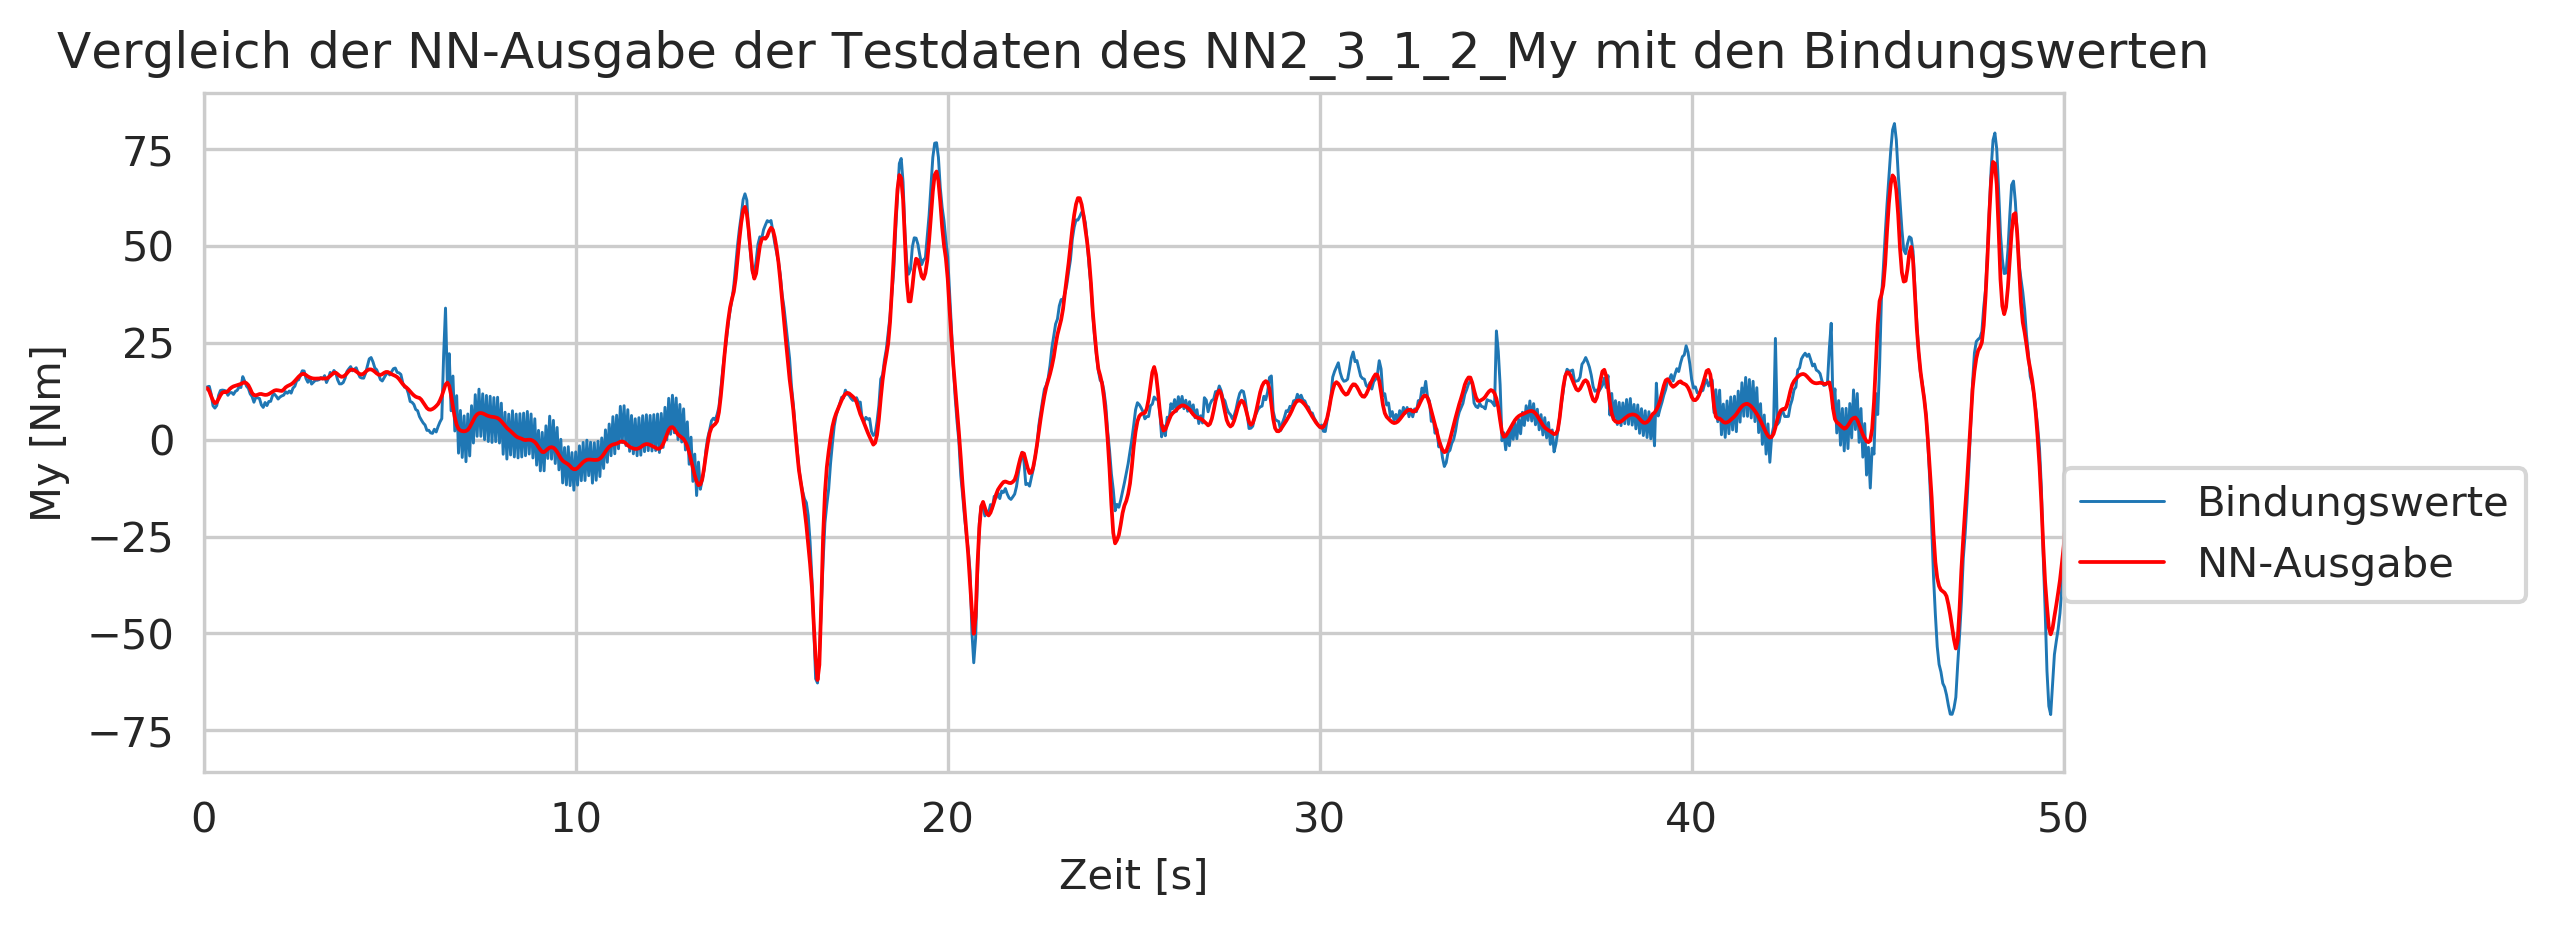

In [7]:
plt.figure(num=None, figsize=(8,3), dpi=300, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('My [Nm]')
plt.legend(bbox_to_anchor=(1, 0.25, 0.2, 0.5), borderaxespad=0)
plt.xlim(left=0, right=50)
#plt.xlim(left=150, right=200)
#plt.ylim(bottom=-10, top=10)
plt.show()

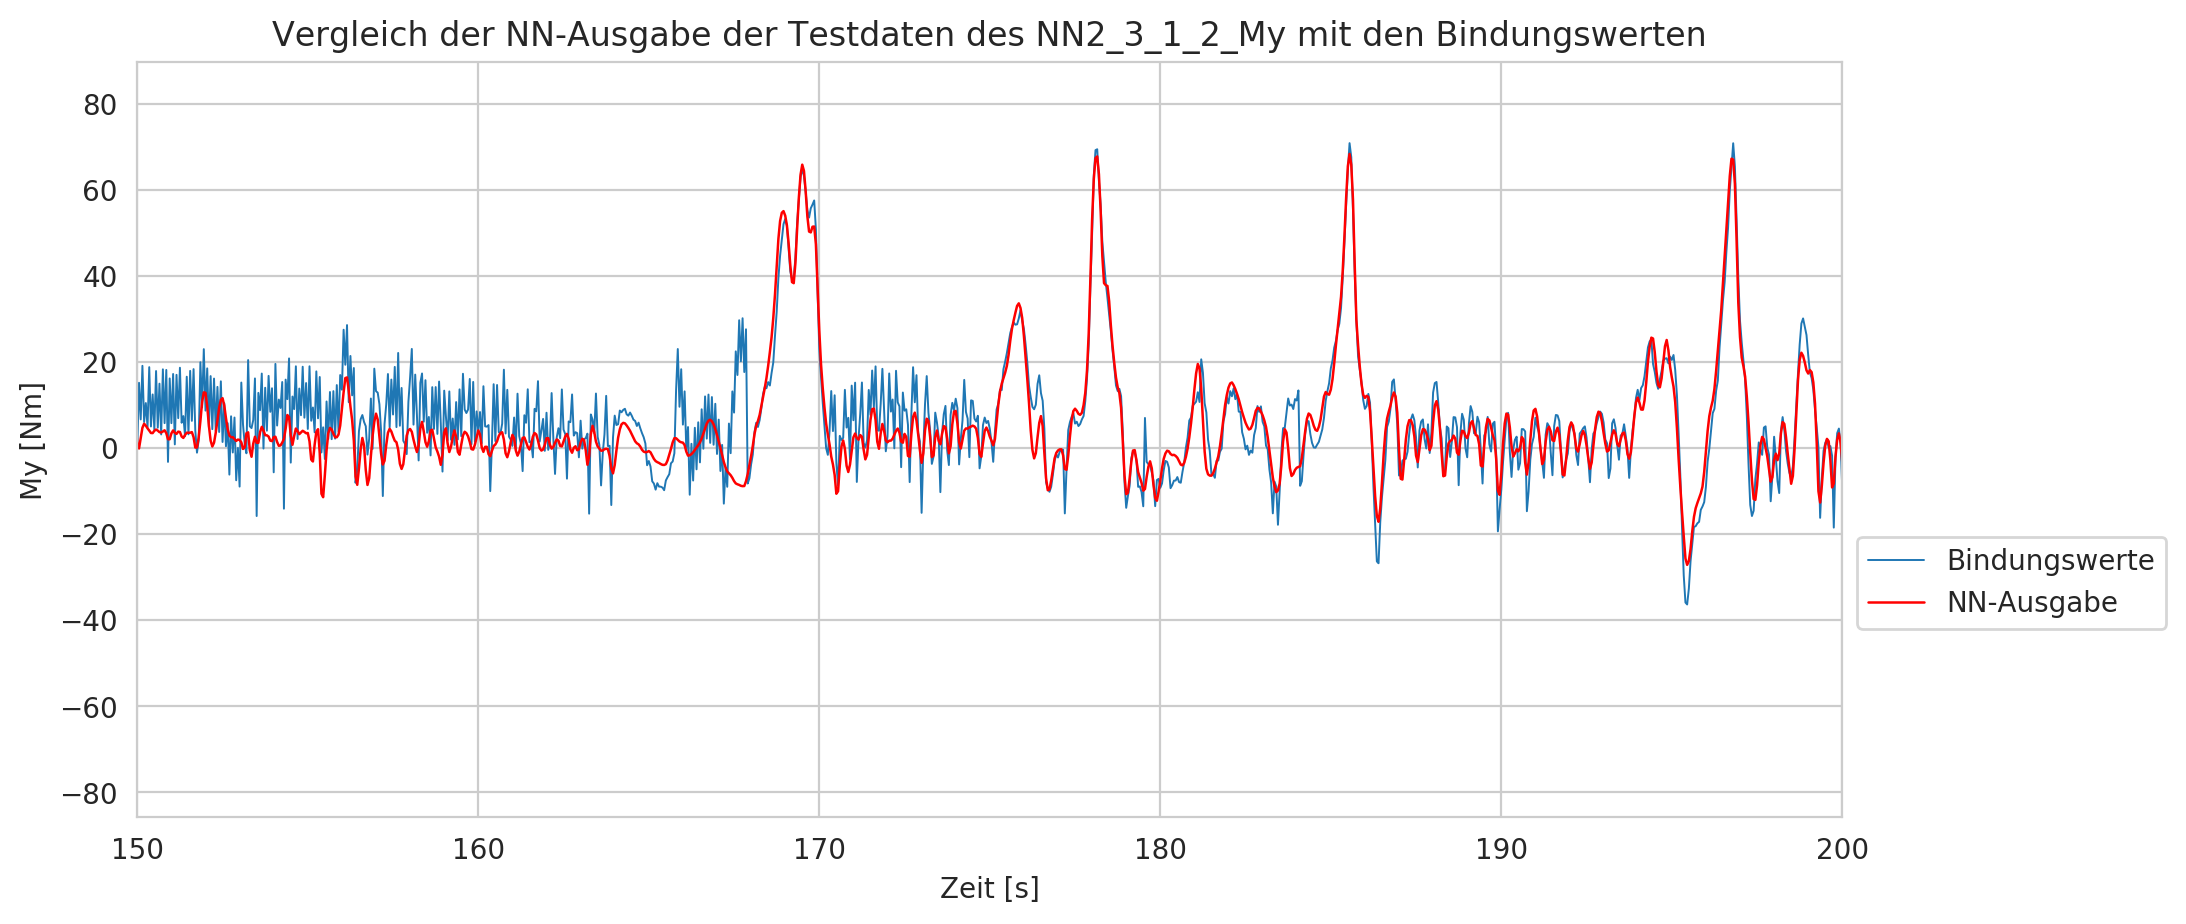

In [8]:
plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('My [Nm]')
plt.legend(bbox_to_anchor=(0.61, 0.25, 0.58, 0.45), borderaxespad=0)
#plt.xlim(left=0, right=50)
plt.xlim(left=150, right=200)
#plt.ylim(bottom=-10, top=10)
plt.show()

## Zusammenfassung

In [9]:
# Nach welcher Epoche sollte das Training optimalerweise abgeschlossen werden?
# Vorgehen: einmal Netzwerk berechnen in 25 Epochen -> optimale Epochenanzahl anhand 'min_index_val_loss+1' ablesen und als Parameter oben angeben,
#           danach Netzwerk neu berechnen lassen.
min_index_val_loss, min_value_val_loss = min(enumerate(history_dict['val_loss']), key=operator.itemgetter(1))
#max_index_val_acc, max_value_val_acc = max(enumerate(history_dict['val_acc']), key=operator.itemgetter(1))
print('Ergebnisse der Validierungsdaten:')
print('  opimale Epochenanzahl:                 '+str(min_index_val_loss+1))
print('  minimaler Verlust:                     '+str(min_value_val_loss)+'\n')

print('Ergebnisse der Trainingdaten zur optimalen Epochenzahl:')
print('  Verlust:                               '+str(history_dict['loss'][min_index_val_loss]) + '\n')

NameError: name 'history_dict' is not defined

In [10]:
# Beurteilung der Testdaten: Vergleich von 'predictions' mit y_real
#                  - Kreuzkorrelation
#                  - Euklidsche Distanz
#   Kreuzkorrelation
print('Vergleich der Vorhersagewerte mit den Bindungswerten:')
print('  Korrelationskoeffizient:               '+ str(np.corrcoef(np.transpose(predictions),np.transpose(y_real))[0,1]))

#   Euklidsche Distanz
summe=0
for i in range(len(predictions)):
    summe+=math.pow(predictions[i]-y_real[i],2)
print('  Euklidsche Distanz:                    '+ str(math.sqrt(summe))+'\n\n')

print(model.summary())

Vergleich der Vorhersagewerte mit den Bindungswerten:
  Korrelationskoeffizient:               0.9346686121322699
  Euklidsche Distanz:                    481.1862537023323


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 22, 64)            21760     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
print(name)

NN2_3_1_2_My


In [17]:
#model.save('model/'+name) 

In [18]:
import os; os.system('say "Berechnung beendet   '+name+'"'); print('\a\a\a') #gibt unter MacOS Soundsignal, wenn berechnung beendet ist




# Bland-Altmann

In [12]:
subtr = predictions - y_real 
mean_bland = subtr.mean(axis=0)
std_bland = subtr.std(axis=0)

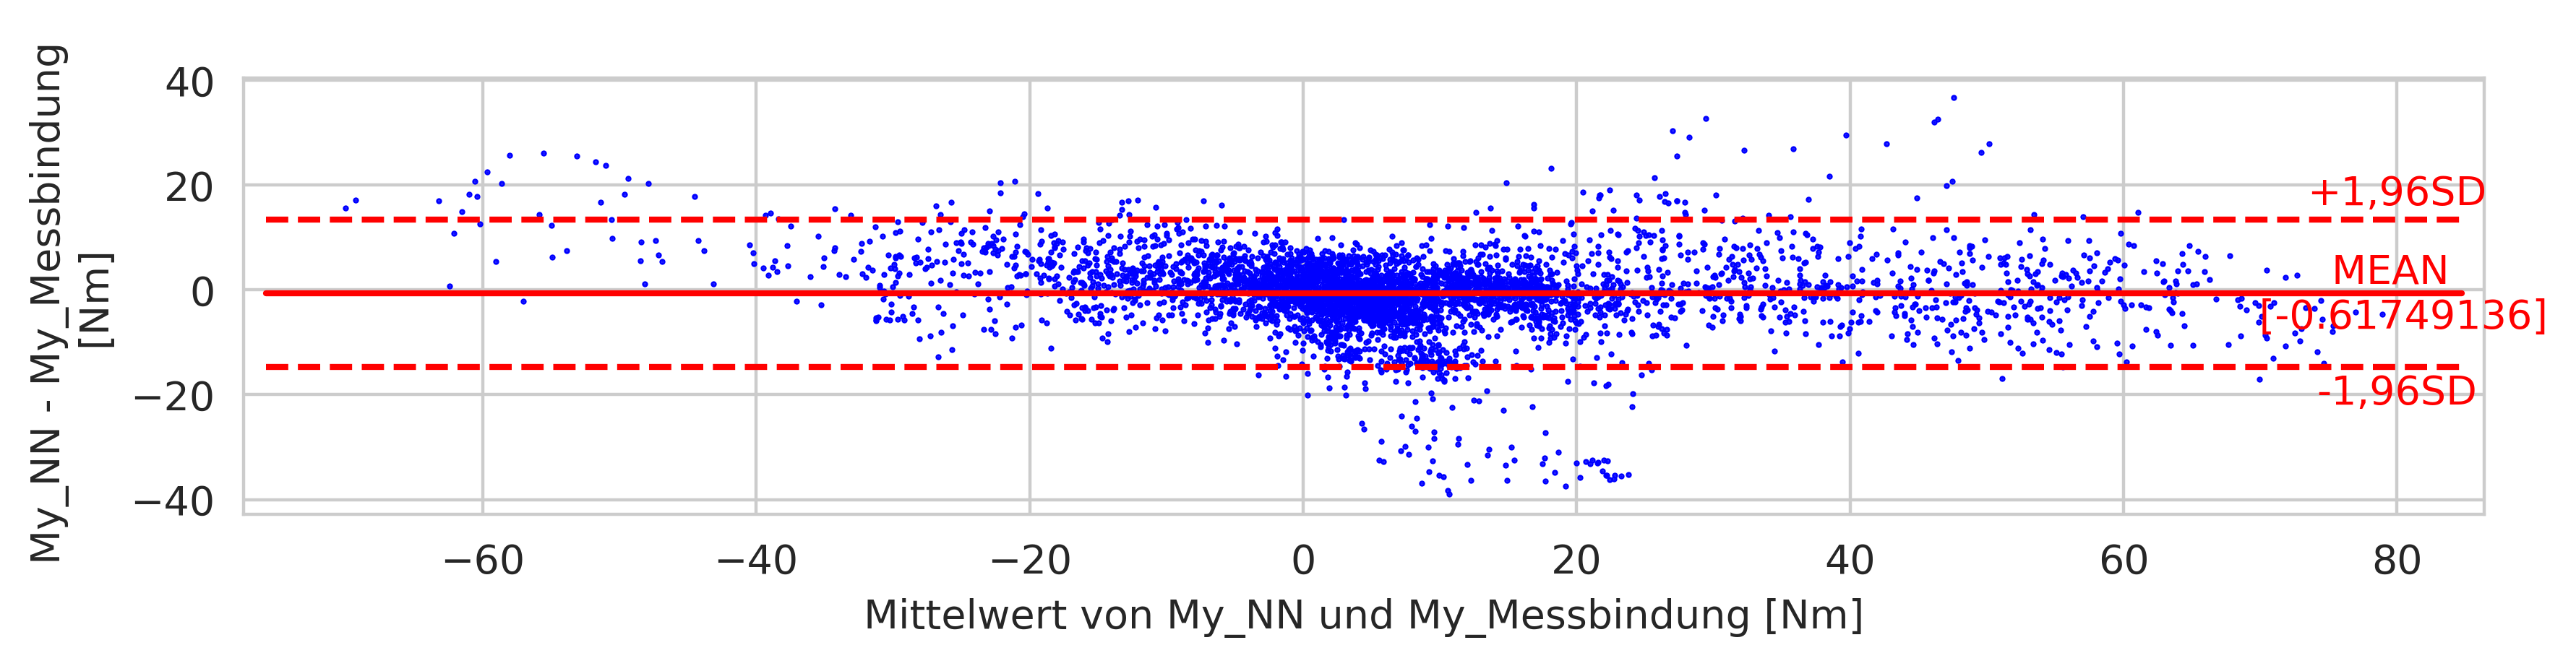

In [13]:
plt.figure(num=None, figsize=(10,2), dpi=400, facecolor='w', edgecolor='k')
plt.plot((y_real+predictions)/2, subtr, 'b.', markersize=1, label='Bindungswerte', linewidth=0.2)
#plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

#plt.title('Bland-Altmann-Diagramm zum Vergleich des ' +name +' mit den Messbindungswerten')
plt.xlabel('Mittelwert von My_NN und My_Messbindung [Nm]')
plt.ylabel('My_NN - My_Messbindung \n[Nm]')
plt.axhline(y=mean_bland, xmin=0.01, xmax=0.99, color='r')
plt.axhline(y=mean_bland-1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--')
plt.axhline(y=mean_bland+1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--')

plt.text(80, 7, 'MEAN \n '+str(mean_bland),horizontalalignment='center', verticalalignment='top',
          multialignment='center', color='r')
plt.text(80, 22, '+1,96SD',
          horizontalalignment='center',
          verticalalignment='top',
          multialignment='center', color='r')
plt.text(80, -16, '-1,96SD',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center', color='r')

plt.show()

In [16]:
#MSE:
print('  MSE:               '+ str(((subtr**2).sum(axis=0)/len(subtr))**(1/2)))#/(max(y_real)-min(y_real))

  MSE:               [7.189095]
